# BladeX

## Tutorial 4: Deform a blade using a parameter file

In this tutorial we show how to deform a blade using a parameter file. A BladeX parameter file is a file that contains information about the radial distribution of parameters `chord`, `pitch`, `rake`, `skew`, `camber` at specific radial sections. In addition to that, it also contains information about the B-spline construction of each of the parametric curves as well as their control points deformations as a way to deform the whole blade.

The tutorial is divided into two sections: the first section deals with the `ParamFile` class,  where it shows how to handle a parameter file in terms of reading an initial file, perform some changes to the included parameters, and then writing out the manipulated data. The second section deals with the `Deformation` class which is responsible for deforming the blade parametric curves based on the information given in a parameter file. The `Deformation` class also allows us to export the parameter file of the deformed radial distribution of the parameters, so that we can read that deformed parameters of the exported file via the `ParamFile` class, and also to generate the deformed blade via the `Blade` class.

First of all we import from BladeX the `ParamFile` class for handling the parameter file, and we import the `Deformation` class for the blade deformation.
We also import `numpy` and we set `matplotlib` for the notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from bladex import ParamFile, Deformation

### 4.1 Handling parameter file

We instantiate the object **param_file** of the `ParamFile` class, then we read the parameter file through the `read_parameters` method with passing a valid string for the parameter file name. In case the filename does not exist then the method creates a default parameter file then reads it. In this tutorial we generate a default parameter file using this procedure, then we operate on the file data using the `ParamFile` module.

In [2]:
# In order to ensure that the method generates a reads a default parameter file,
# we have first to check and remove the parameter file if exists.
import os
if os.path.exists('data/parameters.prm'):
    os.remove('data/parameters.prm')

# Instantiate the ParamFile object, generate a default parameter file then reads it
param_file = ParamFile()
param_file.read_parameters(filename='data/parameters.prm')

To show the associated data of the `ParamFile` object we just need to print that object. The associated data are as follows:

1. Radii sections.

2. Radial distribution of the parameters `chord lengths`, `pitch`, `rake`, `skew`, `camber`

3. BSpline curve constructing the radial distribution of the previous parameters. The specified information are:
    - spline degree
    - spline discrete points to be evaluated (npoints)
    - spline control points (nbasis)
    - Y deformation of the control points

In [3]:
print(param_file)

radii = [0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

chord = [0. 0. 0. 0. 0. 0. 0. 0.]
chord degree = 3
chord npoints = 500
chord nbasis = 10
chord control points deformations = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

pitch = [0. 0. 0. 0. 0. 0. 0. 0.]
pitch degree = 3
pitch npoints = 500
pitch nbasis = 10
pitch control points deformations = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

rake = [0. 0. 0. 0. 0. 0. 0. 0.]
rake degree = 3
rake npoints = 500
rake nbasis = 10
rake control points deformations = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

skew = [0. 0. 0. 0. 0. 0. 0. 0.]
skew degree = 3
skew npoints = 500
skew nbasis = 10
skew control points deformations = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

camber = [0. 0. 0. 0. 0. 0. 0. 0.]
camber degree = 3
camber npoints = 500
camber nbasis = 10
camber control points deformations = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


From the previous output, we notice that the default parameter file involves 8 blade sections at radii from 0.3 to 1.0 with a step size 0.1. The radial distribution of the `chord`, `pitch`, `rake`, `skew`, `camber` are all array of zeros (with length = 8). The default spline degree is 3, and the spline is constructed with 500 points for evaluating the B-spline. Finally each spline is associated with 10 control points by default, and the default deformations are array of zeros (with length = 10) for all the parameters. We also emphasize that all the arrays for the radial distribution of parameters `chord`, `pitch`, `rake`, `skew`, `camber` must have the same length as the radial sections; which is 8 in this tutorial; otherwise an exception is raised.

Now suppose we want to change some values in the parameter file. We can do that either by opening the file and changing the values manually, or we can go the smarter way and change the values through the module itself.

Suppose we are interested in changing the following parameters:

- First radial section, i.e. `radii[0]` = 0.31.  (Default value was 0.3) 

- Radial distribution of the chord = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9].  (Default was array of zeros)

- Radial distribution of the pitch = [0.1, 0.14, 0.19, 0.25, 0.28, 0.26, 0.23, 0.15].  (Default was array of zeros)

- Pitch deformations = [0.025, 0.025, 0.03, 0.01, -0.009, -0.01, -0.02, -0.03, -0.03, -0.05].  (Default was   array of zeros)

- Radial distribution of the rake = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08].  (Default was array of zeros)

- Spline degree of the rake = 5.  (Default was 3)

- Spline number of points for the rake = 1000.  (Default was 500)

- Radial distribution of the skew = [0.3, 0.25, 0.21, 0.18, 0.19, 0.23, 0.28, 0.32].  (Default was array of zeros)

- Number of control points for the skew = 5.  (Default was 10)   //  Now we have to change the length of
  deformations array for the skew curve as well

- Deformations array of the skew = [-0.01, -0.03, -0.06, -0.04, 0.07].  (Default was array of zeros with length=10)

We apply these changes to the **param_file** object as follows.

In [4]:
# Change radii first section
param_file.radii[0] = 0.31

# Change radial distribution of chord. Same procedure can be applied to other
# parameters by simply replacing the string 'chord' into any of the
# following: 'pitch', 'rake', 'skew', or 'camber'
param_file.parameters['chord'] = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# Change radial distribution of pitch
param_file.parameters['pitch'] = np.array([0.1, 0.14, 0.19, 0.25, 0.28, 0.26, 0.23, 0.15])

# Change pitch deformations. Same procedure can be applied to other
# parameters by simply replacing the string 'pitch' into any of the
# following: 'chord', 'rake', 'skew', or 'camber'
param_file.deformations['pitch'] = np.array([0.025, 0.025, 0.03, 0.01, -0.009, -0.01, -0.02, -0.03, -0.03, -0.05])

# Change radial distribution of rake
param_file.parameters['rake'] = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08])

# Change spline degree of rake. Same procedure can be applied to other
# parameters by simply replacing the string 'rake' into any of the
# following: 'chord', 'pitch', 'skew', or 'camber'
param_file.degree['rake'] = 5

# Change spline npoints of rake. Same procedure can be applied to other
# parameters by simply replacing the string 'rake' into any of the
# following: 'chord', 'pitch', 'skew', or 'camber'
param_file.npoints['rake'] = 1000

# Change radial distribution of skew angles
param_file.parameters['skew'] = np.array([0.3, 0.25, 0.21, 0.18, 0.19, 0.23, 0.28, 0.32])

# Change number of control points of skew spline curve. Same procedure can be applied to other
# parameters by simply replacing the string 'skew' into any of the
# following: 'chord', 'pitch', 'rake', or 'camber'
param_file.nbasis['skew'] = 5

# Change Y control points deformations of skew spline curve. Same procedure can be applied to other
# parameters by simply replacing the string 'skew' into any of the
# following: 'chord', 'pitch', 'rake', or 'camber'
param_file.deformations['skew'] = np.array([-0.01, -0.03, -0.06, -0.04, 0.07])

Now to be sure that the **param_file** object holds the updated data correctly, we print out the associated data of the object.

In [5]:
print(param_file)

radii = [0.31 0.4  0.5  0.6  0.7  0.8  0.9  1.  ]

chord = [0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
chord degree = 3
chord npoints = 500
chord nbasis = 10
chord control points deformations = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

pitch = [0.1  0.14 0.19 0.25 0.28 0.26 0.23 0.15]
pitch degree = 3
pitch npoints = 500
pitch nbasis = 10
pitch control points deformations = [ 0.025  0.025  0.03   0.01  -0.009 -0.01  -0.02  -0.03  -0.03  -0.05 ]

rake = [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08]
rake degree = 5
rake npoints = 1000
rake nbasis = 10
rake control points deformations = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

skew = [0.3  0.25 0.21 0.18 0.19 0.23 0.28 0.32]
skew degree = 3
skew npoints = 500
skew nbasis = 5
skew control points deformations = [-0.01 -0.03 -0.06 -0.04  0.07]

camber = [0. 0. 0. 0. 0. 0. 0. 0.]
camber degree = 3
camber npoints = 500
camber nbasis = 10
camber control points deformations = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Now after we confirm the data correctness, we write out a parameter file with the same filename to replace the old file.

In [6]:
param_file.write_parameters(filename='data/parameters.prm')

### 4.2 Deformation

Now that we prepared the parameters file with the desired data, we wish to apply the deformations to the parametric curves. In this tutorial we deform only the pitch and skew curves by specifying their deformation arrays with non-zero values. After that we evaluate the radial distribution of the deformed curves at the same radial sections, i.e. radii = [0.31, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] and then export a new parameters file holding the deformed parameters while resetting the deformations back to zeros.

First of all We instantiate the deformation object **deform**

In [7]:
deform = Deformation(paramfile='data/parameters.prm')

If we want to access the `ParamFile` attributes (e.g. `radii`, `parameters`, `degree`, `nbasis`, `npoints`, `deformations`) through the **deform** object, then we can do that through the `param` attribute. An example is shown below.

In [8]:
# Radial distribution of chord
print(deform.param.parameters['chord'])

# Control points deformations of pitch
print(deform.param.deformations['pitch'])

# Spline degree of rake
print(deform.param.degree['rake'])

[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[ 0.025  0.025  0.03   0.01  -0.009 -0.01  -0.02  -0.03  -0.03  -0.05 ]
5


Besides the `param` attribute, the **deform** object has also `paramfile`, `deformed_parameters`, `control_points`, `spline`. The last three attributes are Python dictionaries where the valid keys are the strings (`chord`, `pitch`, `rake`, `skew`, `camber`). An example of how to access such attributes is shown below.

In [9]:
print('Parameter file name: ', deform.paramfile)
print('Initial values of chord deformed radial distribution (no computations performed yet): ', deform.deformed_parameters['chord'])
print('Initial control points coordinates of pitch: ', deform.control_points['pitch'])
print('Initial spline evaluations of camber: ', deform.spline['camber'])

Parameter file name:  data/parameters.prm
Initial values of chord deformed radial distribution (no computations performed yet):  [0. 0. 0. 0. 0. 0. 0. 0.]
Initial control points coordinates of pitch:  None
Initial spline evaluations of camber:  None


Now we compute the control points of the pitch and skew curves.

In [10]:
deform.compute_control_points(param='pitch')
deform.compute_control_points(param='skew')

Since we have non-zero deformation values for the pitch and skew control points, we update the control points for these two parameters using the `update_control_points` method.

In [11]:
deform.update_control_points(param='pitch')
deform.update_control_points(param='skew')

Now we generate the spline curve for both parameters, and then we plot the original control points, the updated control points, and the B-spline interpolation from the updated control points.

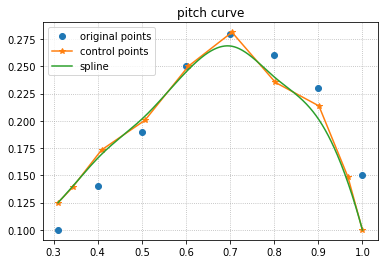

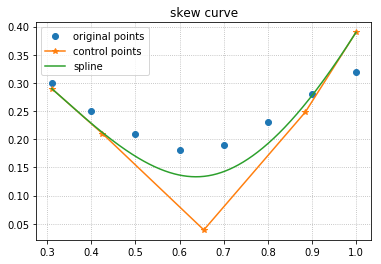

In [12]:
deform.generate_spline(param='pitch')
deform.generate_spline(param='skew')

deform.plot(param=['pitch', 'skew'], original=True, ctrl_points=True, spline=True, rbf=False, rbf_points=500, deformed=False, outfile=None)

To compute the deformed radial distribution of the `pitch` and `rake`, at the same radial sections, we run the `compute_deformed_parameters` for both parameters. This method searches the spline npoints evaluations for those who lie at the radii sections within some tolerance. It is important to specify the tolerance carefully so that finding the deformed parameters is feasible.

In [13]:
deform.compute_deformed_parameters(param='pitch', tol=1e-3)
deform.compute_deformed_parameters(param='skew', tol=1e-3)

print('Pitch deformed parameters: ', deform.deformed_parameters['pitch'])
print('\nSkew deformed parameters: ', deform.deformed_parameters['skew'])

Pitch deformed parameters:  [0.125      0.16574783 0.20136384 0.24487888 0.26863638 0.24044546
 0.20240514 0.1       ]

Skew deformed parameters:  [0.29       0.22816969 0.16991148 0.13624528 0.14244202 0.19176164
 0.27649311 0.39      ]


Finally we plot the `pitch` and `skew` curves including the following:

- Original radial distribution of the parameter.

- Radial Basis Function (RBF) interpolation of the radial distribution of the parameter.

- Updated control points of the B-spline interpolation, after performing the deformation.

- B-spline interpolation of the parametric curve, constructed using the control points.

- Deformed radial distribution of the parameter.

We also export a new parameter file which contains now the radial sections of the deformed parameters, while the deformations array is reset to zeros, since we already applied the deformation.

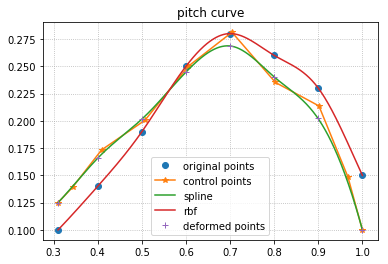

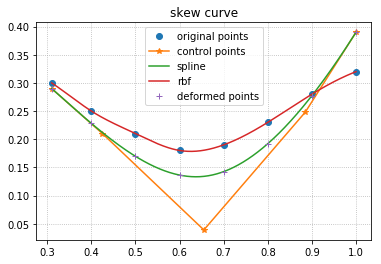

In [14]:
deform.plot(param=['pitch', 'skew'], original=True, ctrl_points=True, spline=True, rbf=True, rbf_points=500, deformed=True, outfile=None)
deform.export_param_file(outfile='data/parameters_mod.prm')

We can also plot the undeformed and deformed blade sectional profiles by using the `Blade` class.

In [15]:
from bladex import Blade, NacaProfile

param_undeformed = ParamFile()
param_undeformed.read_parameters(filename='data/parameters.prm')
param_deformed = ParamFile()
param_deformed.read_parameters(filename='data/parameters_mod.prm')

sections_undeformed = np.asarray([NacaProfile(digits='0012') for i in range(8)])
sections_deformed = np.asarray([NacaProfile(digits='0012') for i in range(8)])

blade_undeformed = Blade(sections=sections_undeformed,
                         radii=param_undeformed.radii,
                         chord_lengths=param_undeformed.parameters['chord'],
                         pitch=param_undeformed.parameters['pitch'],
                         rake=param_undeformed.parameters['rake'],
                         skew_angles=param_undeformed.parameters['skew'])

blade_deformed = Blade(sections=sections_deformed,
                       radii=param_deformed.radii,
                       chord_lengths=param_deformed.parameters['chord'],
                       pitch=param_deformed.parameters['pitch'],
                       rake=param_deformed.parameters['rake'],
                       skew_angles=param_deformed.parameters['skew'])